<a href="https://colab.research.google.com/github/Sumanthbabu-Muthineni/Regression_tensorflow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Regression with neural networks in tensor flow
There are many definitions for regression, but in our case , we going
 to simplify it : Predicting a numerical variable based on some other combination of variables ,even shorter ..predicitng a number.


In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


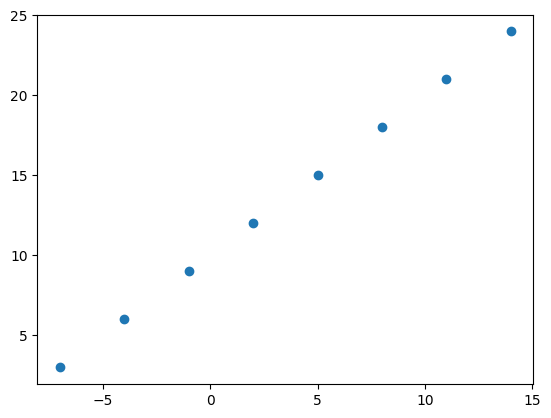

In [2]:
## Creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt

#Create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
Y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0 ])

#Visulize it
plt.scatter(X,Y)

In [3]:
Y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and Output shapes

In [4]:
#Create  a demo tensor  for our housing price prediction problem
house_info =tf.constant(["bedroom", "bathroom","garage"])
house_price=tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0],Y[0]

(np.float64(-7.0), np.float64(3.0))

In [6]:
X[1],Y[1]

(np.float64(-4.0), np.float64(6.0))

In [7]:
X[0].shape

()

In [8]:
X[0].ndim

0

In [9]:
input_shape =X.shape
output_shape=Y.shape
input_shape,output_shape

((8,), (8,))

In [10]:
input_shape=X[0].shape
output_shape=Y[0].shape
input_shape,output_shape

((), ())

###Steps in modelling with tensorflow
1. **Creating a model** - define the input and output layers as well as the hidden layers of a deep learning model.
2. **Compiling a model** -define the loss function (in other words , the function which tells our model  how wrong it is) and the optimizer (tells our model how to improve the patterns  its learning) and evaluation metrics (what we can use to interpret the performance of pur model).
3. **Fitting a model** - letting the model try to find patterns between X & Y (features and labels ).


In [11]:
#Set random seed
tf.random.set_seed(42)
#1 Create a model using the  Sequential API
model =tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # Add input_shape to the first layer
])
#2 Compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])   #mae is short form for mean absolute error... It computes the mean absolute error between labels and predictions
#SGD is short for stochastic gradient descent


#3 Fit the model
model.fit(X,Y,epochs=5)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step - loss: 14.1376 - mae: 14.1376
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 14.0051 - mae: 14.0051
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 13.8726 - mae: 13.8726
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 13.7401 - mae: 13.7401
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.6076 - mae: 13.6076


In [12]:
# Checkout X and Y
#Turn our numpy arrays to tensors
X=tf.cast(tf.constant(X),dtype=tf.float32)
Y=tf.cast(tf.constant(Y),dtype=tf.float32)

X,Y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
#Try and make a prediction usin our model
y_pred=model.predict(tf.constant([17.0])) # Convert the input to a tensor
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[-0.07190696]], dtype=float32)

In [14]:
y_pred+14

array([[13.928093]], dtype=float32)

###Improivng our model

We can improve the model, by altering the steps we used to create the model.

1. **Creatin a Model** - Here we might addd more layers ,increase the no. of units  (all called neurons) within each of the hidden layers ,change the acitivation function of each layer.
2. **Compiling a model** - Here we might change the optimisation function or perhaps the **learning rate **of the optimisation function.
3. **Fitting a model ** - Here we might fit a model for more   **epochs** (leave it training for longer ) or on more data (give the model more examples to learn from ).

### Common ways to improve the model: (followed below steps to improve model)
1. Adding layers
2. Increase the no .of hidden units
3. Change the activation functions
4. Change the optimisation function
5. Change the learning rate (most important param)
6. Fitting on more data
7. Fittin for longer (ex: epochs=100)


In [15]:
#Lets rebuild the model
#1. Create the model
model= tf.keras.Sequential([tf.keras.layers.Dense(1)])
#2 Compile the Model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"] )
#3 Fit the model (this time we will train for longer)
model.fit(tf.expand_dims(X, axis=-1),Y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step - loss: 12.4927 - mae: 12.4927
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.4882 - mae: 12.4882
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 12.4837 - mae: 12.4837
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.4792 - mae: 12.4792
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 12.4747 - mae: 12.4747
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 12.4702 - mae: 12.4702
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 12.4657 - mae: 12.4657
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.4612 - mae: 12.4612
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 12.4567 - mae: 12.4567
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 12.4522 - mae: 12.4522
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 12.4477 - mae: 12.4477
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 12.4432 - mae: 12.4432
Epoch 13/100
1/1 ━━━━━━

In [16]:
#Lets see if out model's prediction has improved
y_pred=model.predict(tf.constant([17.0])) # Convert the input to a tensor
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[6.6926174]], dtype=float32)

In [17]:
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
#Lets rebuild the model
#1. Create the model (this time with extra hidden model)
model= tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])
#2 Compile the Model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])
#3 Fit the model (this time we will train for longer)
model.fit(tf.expand_dims(X, axis=-1),Y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.0938 - mae: 13.0938
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - loss: 12.3639 - mae: 12.3639
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 11.6281 - mae: 11.6281
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 10.8846 - mae: 10.8846
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 10.1317 - mae: 10.1317
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 9.3675 - mae: 9.3675
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 8.5904 - mae: 8.5904
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 7.7986 - mae: 7.7986
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 6.9901 - mae: 6.9901
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 6.7300 - mae: 6.7300
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 7.1313 - mae: 7.1313
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 7.4803 - mae: 7.4803
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━

In [19]:
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[25.700962]], dtype=float32)

## Evaluating a Model

In practice , a typical workflow you will go thorugh when builing neural network is :

```  
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...

```



When it comes to evaluation .. there are 3 words you should memorize :
"Visulize Visualize Visualize"

It's a good idea to visualize :
* The data - what data we are working with? what does it look like ?
* The model itself - what does our model look like ?
* The training of a model - how does a model perform while it learns ?
* The predictions of the model - how do the predictions of a model line up against the ground truth (The original labels) ?

In [21]:
#Make a bigger dataset
X= tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# Make labels for the dataset
Y=X+10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

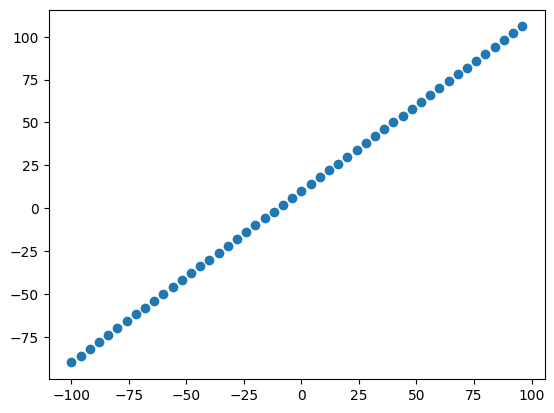

In [23]:
#Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,Y)

### The 3 sets ...

* **Training set** - The model learns from this data , which is typically 70-80% of the data you have available.
* **Validation set** - The model gets tune on this data , which is typically 10-15% of the data available .
* **Test set** - the model gets evaluated on this data to test what is learned , this is set typically 10-15% of the total data available


In [24]:
#Check the lenght of the  samples we have
len(X)

50

In [25]:
#Split the data into train and test sets
X_train=X[:40]
Y_train=Y[:40]
X_test=X[40:]
Y_test=Y[40:]
len(X_train),len(X_test) ,len(Y_train),len(Y_test)

(40, 10, 40, 10)

### Visualising the data
Now we have got our data in training and tests sets...  lets visualise again

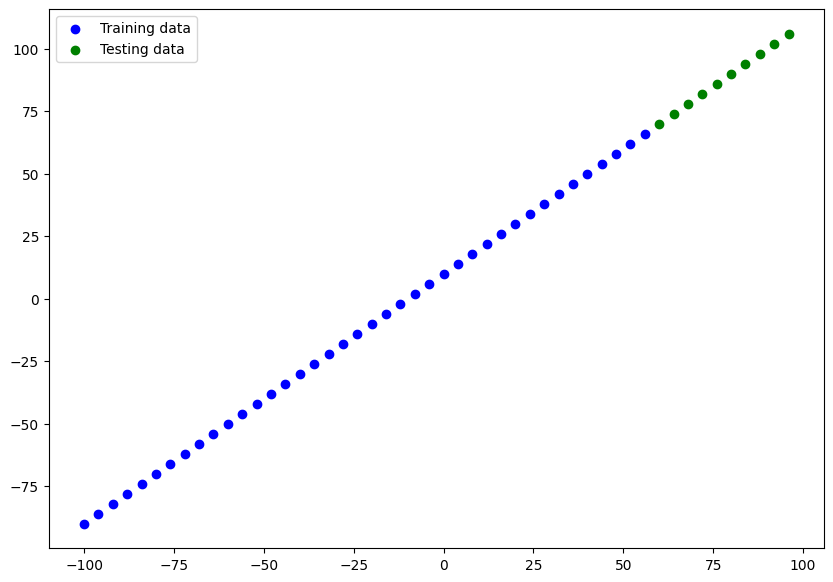

In [26]:
plt.figure(figsize=(10,7))
#Plot training data in blue
plt.scatter(X_train,Y_train,c="b",label="Training data")
#Plot testing data in green
plt.scatter(X_test,Y_test,c="g",label="Testing data")
#Show a legend
plt.legend();

In [31]:
#Lets have a look at how to build  a neural network
#1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2 Compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

#3 Fit the model
# model.fit(X_train,Y_train,epochs=100)

### Visualizing the model


In [32]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [69]:
#Lets  create a model which builds automatically by defining the input_shape arument in the first layer
tf.random.set_seed(42)

#1 Create a model (same as above)
model =tf.keras.Sequential([
    tf.keras.layers.Dense(3,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer") # Add an output layer with 1 unit
] ,name="model_1")

#2 Compile the model (Same as above)
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

In [70]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model (both X and Y combination params)
* Trainable parameters - these are the parameters (patterns) the model can update as it trains. (no. of params which we provided inside Dense)
* Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters  from other models during **tranfer learning**)

In [71]:
#lets fit our model to training data
model.fit(X_train,Y_train,epochs=100,verbose=0)

In [72]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (52.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

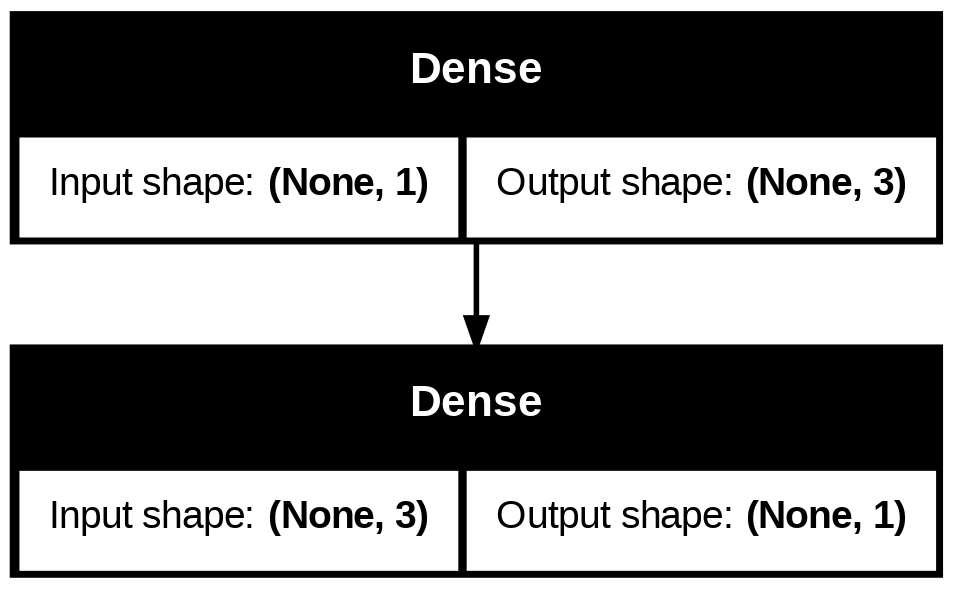

In [73]:
# one more way to visualise
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

 ### Visualising our model's predictions